In [1]:
#Import the basic libraries for EDA and Stats 
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import geopy

In [2]:
#open total cleaned GVA dataset from 2013 to 2020
with open('Data/alldata1.csv',encoding='Latin1') as f:
    df=pd.read_csv(f, delimiter=',')

In [3]:
#look at dataset header
df.head()

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105
1,1,1/1/2013,California,Hawthorne,1,3,460726
2,2,1/1/2013,Ohio,Lorain,1,3,478855
3,3,1/5/2013,Colorado,Aurora,4,0,478925
4,4,1/7/2013,North Carolina,Greensboro,2,2,478959


In [4]:
#make a clean copy of the dataframe
clean_df = df

In [6]:
df['date'].sort_values()

0         1/1/2013
1         1/1/2013
2         1/1/2013
376       1/1/2014
377       1/1/2014
            ...   
377627    9/9/2020
377626    9/9/2020
377625    9/9/2020
377603    9/9/2020
377524    9/9/2020
Name: date, Length: 397778, dtype: object

In [7]:
#inspect dataframe datatypes
clean_df.dtypes

Unnamed: 0      int64
date           object
state          object
city           object
n_killed        int64
n_injured       int64
incident_id     int64
dtype: object

In [8]:
#create columns for month and year in the dataframe
clean_df["month"]=pd.to_datetime(clean_df['date'])
clean_df['month'] = clean_df['month'].dt.strftime('%Y-%m')
clean_df["year"] = pd.to_datetime(clean_df['date'])
clean_df["year"] = clean_df['year'].dt.strftime('%Y')
clean_df["year"]= clean_df["year"].astype(str).astype(int)

In [9]:
#rename year column to match for merge
clean_df = clean_df.rename(columns= {"year":"Year"})

In [10]:
#show data frame
clean_df.head()

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id,month,Year
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105,2013-01,2013
1,1,1/1/2013,California,Hawthorne,1,3,460726,2013-01,2013
2,2,1/1/2013,Ohio,Lorain,1,3,478855,2013-01,2013
3,3,1/5/2013,Colorado,Aurora,4,0,478925,2013-01,2013
4,4,1/7/2013,North Carolina,Greensboro,2,2,478959,2013-01,2013


In [11]:
#import census data frame
with open('Data/ACS_2013-2019_Cleaning.csv',encoding='Latin1') as f:
    df2=pd.read_csv(f, delimiter=',')
    

In [12]:
# look at census dataframe
df2.head()

,id,Year,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Percent!!SEX AND AGE!!Total population!!Female
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [13]:
#rename census columns
census_state_df = df2
census_state_df = census_state_df.rename(columns ={"Geographic Area Name":"state","Estimate!!SEX AND AGE!!Total population":"Total Population","Estimate!!SEX AND AGE!!Total population!!Male":"Male Population","Percent!!SEX AND AGE!!Total population!!Male":"Percent Male Population","Estimate!!SEX AND AGE!!Total population!!Female":"Female Population","Percent!!SEX AND AGE!!Total population!!Female":"Percent Female Population"})
census_state_df.head()

,id,Year,state,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,1,2019,Alabama,4903185,2369611,48.3,2533574,51.7
1,2,2019,Alaska,731545,380433,52.0,351112,48.0
2,3,2019,Arizona,7278717,3620935,49.7,3657782,50.3
3,4,2019,Arkansas,3017804,1474705,48.9,1543099,51.1
4,5,2019,California,39512223,19640794,49.7,19871429,50.3


In [14]:
#look at census datatypes
census_state_df.dtypes

id                             int64
Year                           int64
state                         object
Total Population               int64
Male Population                int64
Percent Male Population      float64
Female Population              int64
Percent Female Population    float64
dtype: object

In [15]:
#check for the list of states
census_state_df['state'].sort_values()

0      Alabama
312    Alabama
52     Alabama
208    Alabama
156    Alabama
        ...   
258    Wyoming
310    Wyoming
102    Wyoming
362    Wyoming
154    Wyoming
Name: state, Length: 364, dtype: object

In [16]:
#look at the columns of the clean data frame
clean_df.columns

Index(['Unnamed: 0', 'date', 'state', 'city', 'n_killed', 'n_injured',
       'incident_id', 'month', 'Year'],
      dtype='object')

In [17]:
#look at columns of census dataframe
census_state_df.columns

Index(['id', 'Year', 'state', 'Total Population', 'Male Population',
       'Percent Male Population', 'Female Population',
       'Percent Female Population'],
      dtype='object')

In [18]:
#merge census data frame with merged_df = pd.merge(clean_df,
                     census_state_df[['Year','state','Total Population','Male Population',
                                      'Percent Male Population','Female Population','Percent Female Population']], 
                     on =['state','Year'])

In [19]:
# look at merged data frame
merged_df.head()

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id,month,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105,2013-01,2013,12731381,6211805,48.8,6519576,51.2
1,49,4/9/2013,Pennsylvania,Philadelphia,1,3,484268,2013-04,2013,12731381,6211805,48.8,6519576,51.2
2,61,4/28/2013,Pennsylvania,Chester,1,3,485885,2013-04,2013,12731381,6211805,48.8,6519576,51.2
3,67,5/6/2013,Pennsylvania,Johnstown,0,4,486068,2013-05,2013,12731381,6211805,48.8,6519576,51.2
4,70,5/11/2013,Pennsylvania,Philadelphia,0,4,486121,2013-05,2013,12731381,6211805,48.8,6519576,51.2


In [20]:
#create a weighted amount for each state per year
merged_df ['total_population_weighted_by_state'] = merged_df.apply(lambda x: 100000/x['Total Population'], axis = 1) 

In [21]:
#look at dataframe
merged_df.head(10)

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id,month,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population,total_population_weighted_by_state
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105,2013-01,2013,12731381,6211805,48.8,6519576,51.2,0.007855
1,49,4/9/2013,Pennsylvania,Philadelphia,1,3,484268,2013-04,2013,12731381,6211805,48.8,6519576,51.2,0.007855
2,61,4/28/2013,Pennsylvania,Chester,1,3,485885,2013-04,2013,12731381,6211805,48.8,6519576,51.2,0.007855
3,67,5/6/2013,Pennsylvania,Johnstown,0,4,486068,2013-05,2013,12731381,6211805,48.8,6519576,51.2,0.007855
4,70,5/11/2013,Pennsylvania,Philadelphia,0,4,486121,2013-05,2013,12731381,6211805,48.8,6519576,51.2,0.007855
5,77,5/16/2013,Pennsylvania,Philadelphia,0,4,486334,2013-05,2013,12731381,6211805,48.8,6519576,51.2,0.007855
6,96,6/9/2013,Pennsylvania,York,0,4,487645,2013-06,2013,12731381,6211805,48.8,6519576,51.2,0.007855
7,160,8/5/2013,Pennsylvania,Philadelphia,1,0,964573,2013-08,2013,12731381,6211805,48.8,6519576,51.2,0.007855
8,161,8/6/2013,Pennsylvania,Saylorsburg,3,4,491609,2013-08,2013,12731381,6211805,48.8,6519576,51.2,0.007855
9,168,8/13/2013,Pennsylvania,Philadelphia,0,4,491770,2013-08,2013,12731381,6211805,48.8,6519576,51.2,0.007855


In [22]:
#check the structure of the dataframe
merged_df.shape

(335513, 15)

In [23]:
#check the number of gun incident totals grouped by year and state
states_total_incidents=merged_df.groupby(['state','Year']).size()
states_total_incidents_df=pd.DataFrame(states_total_incidents)
states_total_incidents_df.rename(columns = {0:"Incidents"},inplace =True)
states_total_incidents_df.head(50)

Incidents
state       Year           
Alabama     2013          2
            2014       1318
            2015       1034
            2016       1309
            2017       1461
            2018       1322
            2019       1337
Alaska      2014        146
            2015        380
            2016        445
            2017        317
            2018        232
            2019        142
Arizona     2013          5
            2014        556
            2015        480
            2016        554
            2017        587
            2018        536
            2019        629
Arkansas    2014        572
            2015        538
            2016        720
            2017        820
            2018        809
            2019        729
California  2013         39
            2014       3732
            2015       3234
            2016       3617
            2017       4588
            2018       3685
            2019       3268
Colorado    2013          3
            2014        556
            2015        788
            2016        812
            2017        809
            2018        791
            2019        709
Connecticut 2013          3
            2014        583
            2015        737
            2016        803
            2017        780
            2018        829
            2019        799
Delaware    2013          3
            2014        493
            2015        366

In [24]:
#make sure it includes all states
states_total_incidents_df

Incidents
state   Year           
Alabama 2013          2
        2014       1318
        2015       1034
        2016       1309
        2017       1461
...                 ...
Wyoming 2015        198
        2016        127
        2017         91
        2018         44
        2019         39

[343 rows x 1 columns]

In [25]:
#create a new dataframe of gun violence incidents weighted by the states' total population by year
states_total_incidents_weighted = merged_df.groupby(['state','Year'])['total_population_weighted_by_state'].sum()
states_total_incidents_weighted_df = pd.DataFrame(states_total_incidents_weighted)
# states_total_incidents_weighted_df.rename(columns = {0:"Total Incidents In State per 100k"}, inplace = True)
# states_total_incidents_weighted_df.head(10)

In [26]:
#rename the column 
states_total_incidents_weighted_df.columns = ['Total Incidents In State Per 100k']

In [27]:
#look at newly created dataframe
states_total_incidents_weighted_df

Total Incidents In State Per 100k
state   Year                                   
Alabama 2013                           0.041673
        2014                          27.357578
        2015                          21.405120
        2016                          27.038952
        2017                          30.118923
...                                         ...
Wyoming 2015                          34.156835
        2016                          21.782793
        2017                          15.603567
        2018                           7.562268
        2019                           6.738556

[343 rows x 1 columns]

In [28]:
#create a pivot table of the dataframe for ease of inspection
states_weighted_Year_reindexed_df= states_total_incidents_weighted_df.reset_index(level ='Year')
pivoted_total_incident_weighted_df = pd.pivot_table(data = states_weighted_Year_reindexed_df, index ="state", columns ='Year', values = 'Total Incidents In State Per 100k' )
pivoted_total_incident_weighted_df

Year,2013,2014,2015,2016,2017,2018,2019
state,,,,,,,
Alabama,0.041673,27.357578,21.405120,27.038952,30.118923,27.175477,27.267990
Alaska,NaN,20.046684,51.815238,60.391800,42.921070,31.414350,19.410973
Arizona,0.077164,8.473652,7.226817,8.233539,8.619745,7.715911,8.641633
Arkansas,NaN,19.409332,18.186686,24.254903,27.535776,27.050786,24.156638
California,0.103560,9.803788,8.417170,9.357326,11.769279,9.412814,8.270858
Colorado,0.058601,10.697286,14.927335,15.151247,14.880846,14.300847,12.311730
Connecticut,0.083716,16.230273,20.510840,22.376601,21.699952,23.146700,22.410538
Delaware,0.330234,53.758751,39.505469,35.091661,41.219329,39.073402,43.645072
District of Columbia,0.968725,132.231718,83.090856,75.416269,169.841655,96.274934,102.444353


In [29]:
#create a new pivot table without the year 2013 which has very low numbers and is probably an outlier due to sampling errors
t_years = pivoted_total_incident_weighted_df.drop([2013], axis = 1)
t_years

Year,2014,2015,2016,2017,2018,2019
state,,,,,,
Alabama,27.357578,21.405120,27.038952,30.118923,27.175477,27.267990
Alaska,20.046684,51.815238,60.391800,42.921070,31.414350,19.410973
Arizona,8.473652,7.226817,8.233539,8.619745,7.715911,8.641633
Arkansas,19.409332,18.186686,24.254903,27.535776,27.050786,24.156638
California,9.803788,8.417170,9.357326,11.769279,9.412814,8.270858
Colorado,10.697286,14.927335,15.151247,14.880846,14.300847,12.311730
Connecticut,16.230273,20.510840,22.376601,21.699952,23.146700,22.410538
Delaware,53.758751,39.505469,35.091661,41.219329,39.073402,43.645072
District of Columbia,132.231718,83.090856,75.416269,169.841655,96.274934,102.444353


Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2013-2019')

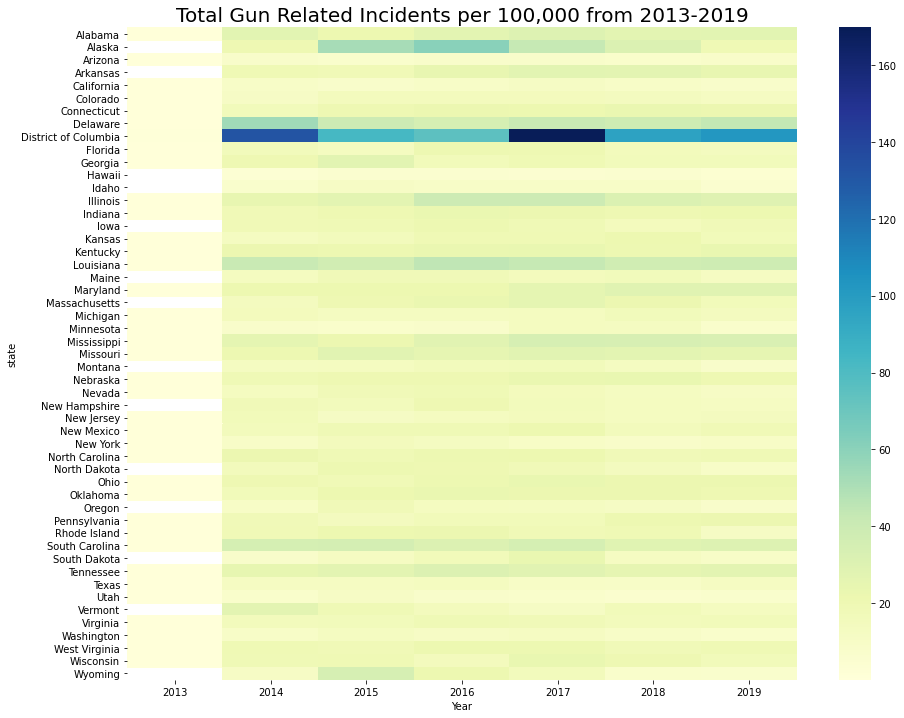

In [30]:
#plot a heat map of total gun incidents per 100,000 residents of each state per year from 2013-2019
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(pivoted_total_incident_weighted_df, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2013-2019", fontsize  = 20)

Text(0.5, 1.0, 'Total Gun Related Incidents per 100,000 from 2014-2019')

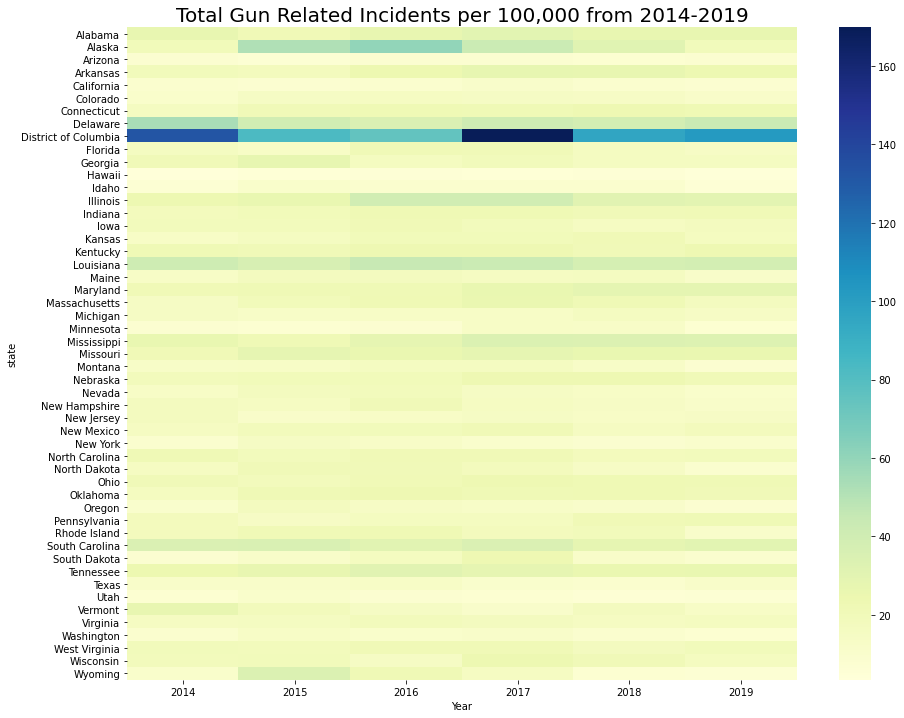

In [31]:
#create heatmap of weighted incidents per 100,000 per state without the year 2013 which is an outlier
plt.figure(figsize=(15, 12)) # We can set the size using matplotlib
sns.heatmap(t_years, cmap="YlGnBu") # cmap defines the color palette
plt.title("Total Gun Related Incidents per 100,000 from 2014-2019", fontsize  = 20)

In [32]:
#inspect data frame
merged_df.head()

,Unnamed: 0,date,state,city,n_killed,n_injured,incident_id,month,Year,Total Population,Male Population,Percent Male Population,Female Population,Percent Female Population,total_population_weighted_by_state
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,461105,2013-01,2013,12731381,6211805,48.8,6519576,51.2,0.007855
1,49,4/9/2013,Pennsylvania,Philadelphia,1,3,484268,2013-04,2013,12731381,6211805,48.8,6519576,51.2,0.007855
2,61,4/28/2013,Pennsylvania,Chester,1,3,485885,2013-04,2013,12731381,6211805,48.8,6519576,51.2,0.007855
3,67,5/6/2013,Pennsylvania,Johnstown,0,4,486068,2013-05,2013,12731381,6211805,48.8,6519576,51.2,0.007855
4,70,5/11/2013,Pennsylvania,Philadelphia,0,4,486121,2013-05,2013,12731381,6211805,48.8,6519576,51.2,0.007855


In [33]:
#Open Database with clean demographic data
with open('Data/CLEAN_GVA.csv',encoding='Latin1') as f:
    clean_df=pd.read_csv(f, delimiter=',')

In [34]:
#Look at Columns and variables
clean_df.head()

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,year,month
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,2014,2014-01
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,2014,2014-01
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,2014,2014-01
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,2014,2014-01


In [35]:
#Check what are the different names for classifying the type of person involved in gun violence
clean_df['type'].drop_duplicates()

0              Victim
2     Subject-Suspect
87                NaN
Name: type, dtype: object

In [36]:
#Check what different types of gender there are in the data set
clean_df['gender'].drop_duplicates()

0                Male
4                 NaN
20             Female
90105    Male, female
Name: gender, dtype: object

In [37]:
#Create a contingency table to 
#understand the categorical distribution of Males, 
#Females, and Male, female
contingency_gender_type = pd.crosstab(
    index=clean_df['type'],columns=clean_df['gender'])
contingency_gender_type

gender,Female,Male,"Male, female"
type,,,
Subject-Suspect,11487,159548,0
Victim,30886,144545,1


In [44]:
#normalize the contingency table across genders
pd.crosstab(
    index=clean_df['type'],columns=clean_df['gender'],
    normalize="columns")*100

gender,Female,Male,"Male, female"
type,,,
Subject-Suspect,27.109244,52.466844,0.0
Victim,72.890756,47.533156,100.0


In [45]:
#normalize the contingency table cross types
pd.crosstab(
    index=clean_df['type'],columns=clean_df['gender'],
    normalize="index")*100

gender,Female,Male,"Male, female"
type,,,
Subject-Suspect,6.716169,93.283831,0.00000
Victim,17.605682,82.393748,0.00057


In [40]:
#inspect census data frame datatype
census_state_df.dtypes

id                             int64
Year                           int64
state                         object
Total Population               int64
Male Population                int64
Percent Male Population      float64
Female Population              int64
Percent Female Population    float64
dtype: object

In [42]:
# create csv for further processing
census_state_df.to_csv(r'C:\Users\emili\Documents\DS4A\Capstone_Project\Guns\Team97_DS4A\Data\Census_state_clean.csv')

In [43]:
#create csv for further processing
t_years.to_csv(r'C:\Users\emili\Documents\DS4A\Capstone_Project\Guns\Team97_DS4A\Data\total_incidents_years_states.csv')